In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
np.random.seed(11)


In [4]:
df  = pd.read_csv('data/full.csv')
path_img = 'data/ISIC_2019_Training_Input'

In [5]:
tfms = get_transforms(flip_vert=True)

In [6]:
train_idx = df[df['is_val']==0].index
val_idx = df[df['is_val']==1].index

In [7]:
src = (ImageList.from_csv(path_img, '../full.csv',suffix='.jpg')
                .split_by_idxs(train_idx,val_idx)
                .label_from_df(cols=1))

In [8]:
data = (src.transform(tfms, size=128)
            .databunch(bs=256)).normalize(imagenet_stats)

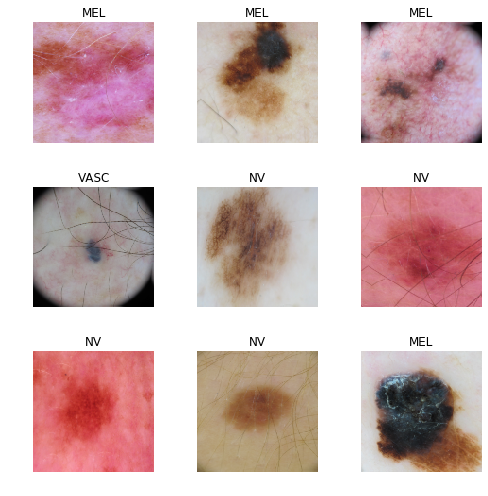

In [7]:
data.show_batch(3, figsize=(7,7))

In [9]:
top_2 = partial(top_k_accuracy, k=2)
top_3 = partial(top_k_accuracy, k=3)

In [8]:
learn = cnn_learner(data, models.densenet161,
                    metrics=[error_rate, top_2, top_3], wd=1e-1).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


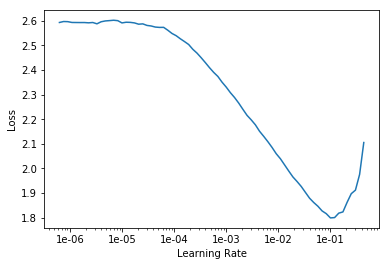

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
gc.collect()
lr = 3e-3
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,error_rate,top_k_accuracy,top_k_accuracy,time
0,1.350480,0.966492,0.340349,0.839642,0.918329,02:30
1,0.929072,0.790031,0.278938,0.875609,0.941574,01:59
2,0.752109,0.746867,0.265431,0.889116,0.950369,02:02
3,0.634472,0.736741,0.255693,0.892571,0.952882,02:01
4,0.565112,0.712172,0.247055,0.899325,0.955081,02:00


In [ ]:
#0.565112	0.712172

In [12]:
learn.save('dense161-1-128')

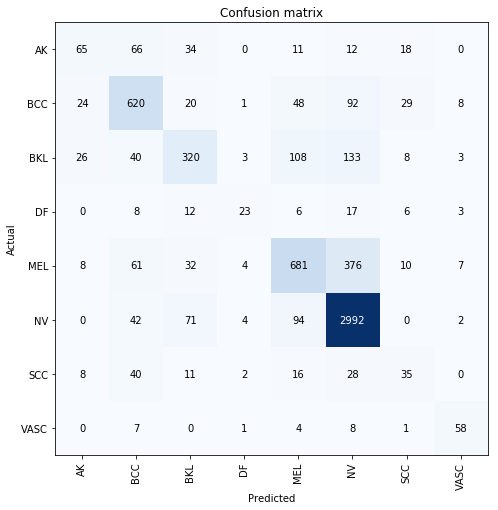

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(7,7))

In [14]:
learn.load('dense161-1-128')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06


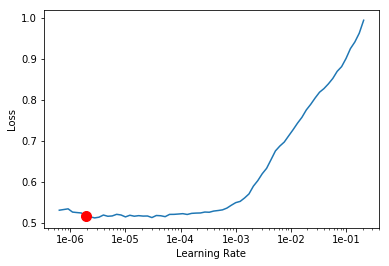

In [14]:
gc.collect()

learn.lr_find()

learn.recorder.plot(suggestion=True)

In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,lr/5))

epoch,train_loss,valid_loss,error_rate,top_k_accuracy,top_k_accuracy,time
0,0.527111,0.716952,0.245956,0.899482,0.953981,02:03
1,0.520729,0.717083,0.247526,0.900267,0.953981,02:06
2,0.482862,0.722877,0.251139,0.899953,0.955081,02:04
3,0.442593,0.729564,0.249568,0.904351,0.954767,02:04
4,0.418340,0.732451,0.249725,0.904351,0.956494,02:04


In [16]:
learn.save('dense161-2-sz128')

In [16]:
#interp = ClassificationInterpretation.from_learner(learn)

In [17]:
#interp.plot_confusion_matrix(figsize=(7,7))

In [18]:
# learn.to_fp32()

# interp = ClassificationInterpretation.from_learner(learn)

# interp.plot_top_losses(9, figsize=(9,9),heatmap=False)

In [10]:
data = (src.transform(tfms, size=299)
            .databunch(bs=16)).normalize(imagenet_stats)

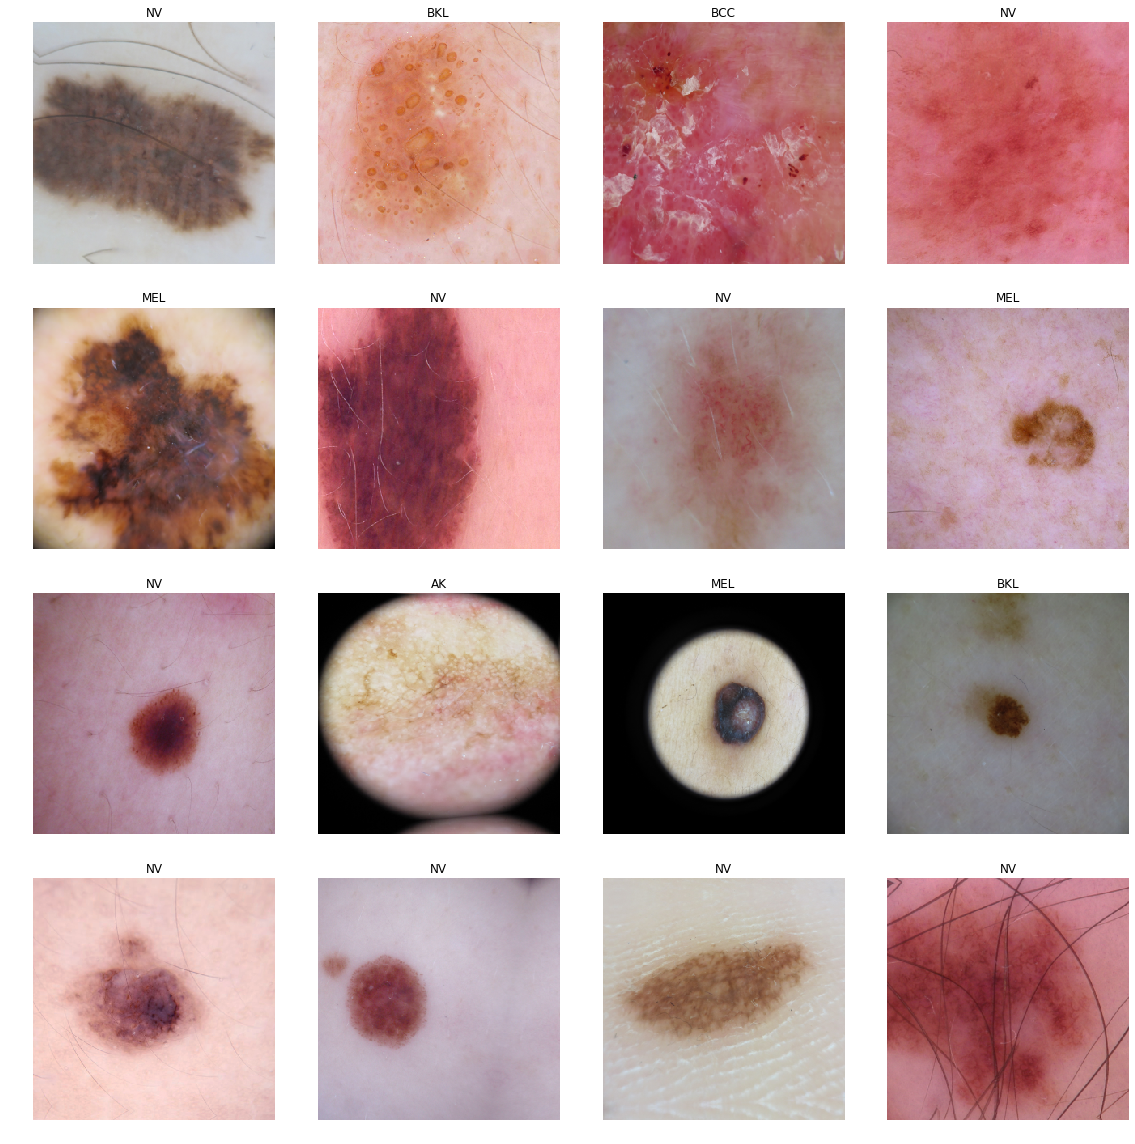

In [11]:
data.show_batch()

In [12]:
learn = cnn_learner(data, models.densenet161,
                     metrics=[error_rate, top_2, top_3], wd=1e-1).to_fp16()

In [13]:
learn.load('dense161-1-128')
learn.freeze()
gc.collect()

0

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


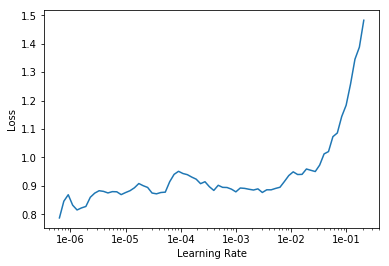

In [15]:
learn.recorder.plot()

In [16]:
lr = 3e-5
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,error_rate,top_k_accuracy,top_k_accuracy,time
0,0.782355,0.733743,0.263389,0.898225,0.952725,08:11
1,0.743058,0.711585,0.256322,0.901209,0.955238,08:04
2,0.702030,0.686192,0.244385,0.909534,0.958536,08:02
3,0.639647,0.677574,0.243757,0.911104,0.960892,08:03
4,0.683097,0.691503,0.250039,0.909377,0.960107,08:02


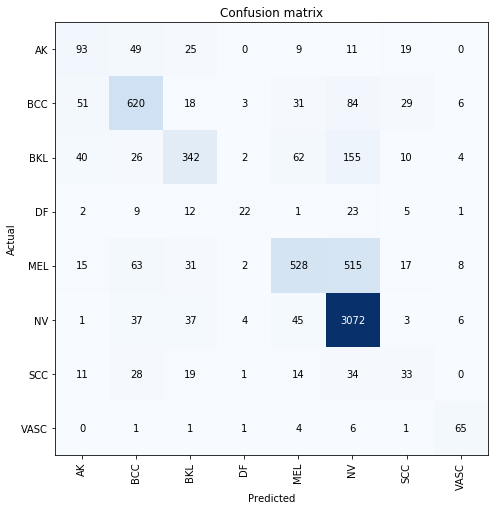

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(7,7))

In [18]:
learn.save('dense161-1-299')